In [1]:
import pandas as pd
import numpy as np

pd.set_option('precision', 13)
pd.options.display.max_rows = 85


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(20,12)


%matplotlib inline

In [2]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import t
from scipy import stats


In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import preprocessing

In [4]:
data = pd.read_csv('C:/00_Projects/Lenin/Datasets/04_work_data/work_region.csv')

In [5]:
data.head()

,datawrapperName,region,lenin_cities,total_cities,city_m5sts,city_m10sts,cities_1_lsts,cities_2_lsts,cities_1_lsts_cm5s,cities_2_lsts_cm5s,...,len_streets_strict,len_only_streets,lenin_street_cm5st,lenin_street_cm10st,monuments_OKN,monuments_lst,monument_OKN_cm5sts,monument_lst_cm5sts,monument_OKN_cm10sts,monument_lst_cm10sts
0,Алтайский край,Алтайский край,5.0,1586,897,482,226,1.0,204,1.0,...,237,227,213,161,2.0,87,2.0,68,2.0,65
1,Амурская область,Амурская область,2.0,637,340,159,58,1.0,53,1.0,...,62,59,57,46,32.0,37,20.0,22,19.0,20
2,Архангельская область,Архангельская область,2.0,3931,353,169,33,4.0,33,4.0,...,39,39,39,37,0.0,49,0.0,31,0.0,30
3,Астраханская область,Астраханская область,1.0,437,228,170,99,6.0,93,6.0,...,112,106,106,88,1.0,38,1.0,21,1.0,19
4,Белгородская область,Белгородская область,4.0,1611,553,247,79,2.0,67,2.0,...,85,81,73,55,14.0,80,11.0,56,9.0,47


In [6]:
all_features = [
    'datawrapperName', 'region',
    'lenin_cities', 'total_cities',
    'city_m5sts', 'city_m10sts',
    'cities_1_lsts', 'cities_2_lsts', 
    'cities_1_lsts_cm5s', 'cities_2_lsts_cm5s',
    'cities_1_lsts_cm10s', 'cities_2_lsts_cm10s',
    'total_streets', 'len_streets_full', 'len_streets_strict', 'len_only_streets',
    'lenin_street_cm5st', 'lenin_street_cm10st',
    'monuments_OKN', 'monuments_lst',
    'monument_OKN_cm5sts', 'monument_lst_cm5sts',
    'monument_OKN_cm10sts', 'monument_lst_cm10sts']

In [7]:
need_features = [
    'region',
    'lenin_cities', 'total_cities',
    'city_m10sts',
    'cities_1_lsts_cm5s', 'cities_2_lsts_cm5s',
    'total_streets', 'len_streets_strict', 'len_only_streets',
    'lenin_street_cm10st',
    'monuments_OKN', 'monuments_lst',
    'monument_OKN_cm10sts', 'monument_lst_cm10sts']

In [8]:
work = data[need_features]

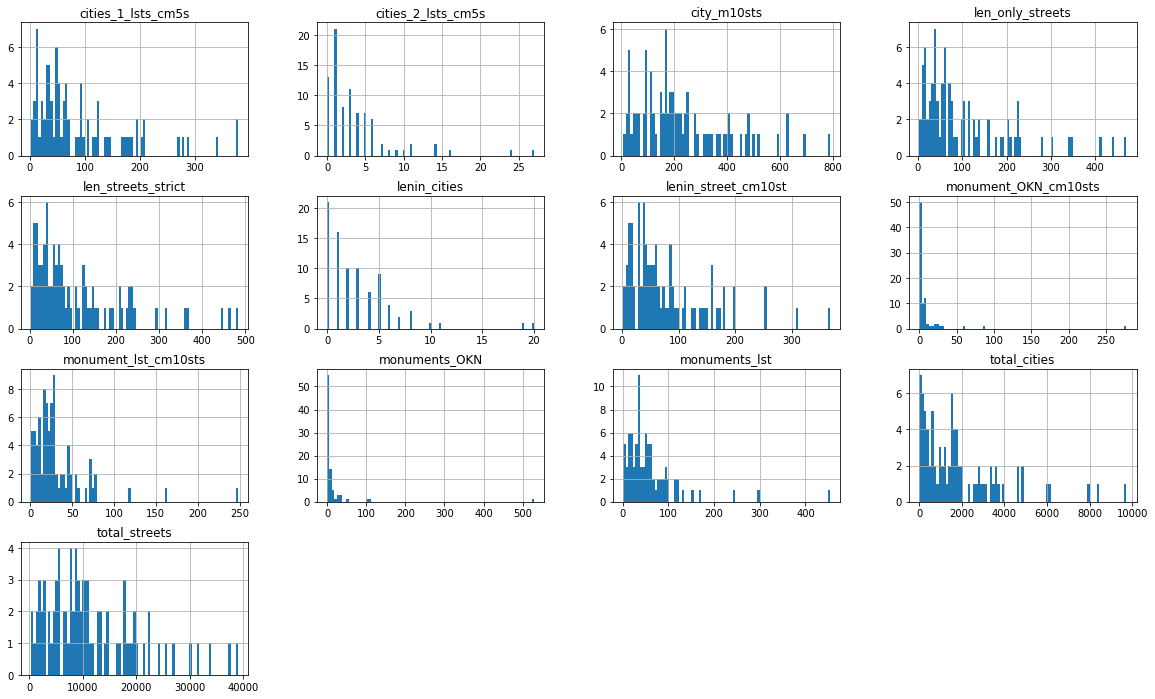

In [9]:
# Гистограммы "для знакомства"

work.hist(bins=85, figsize=(20, 12))
plt.show()

In [10]:
# корреляция

corr_matrix = work.corr()

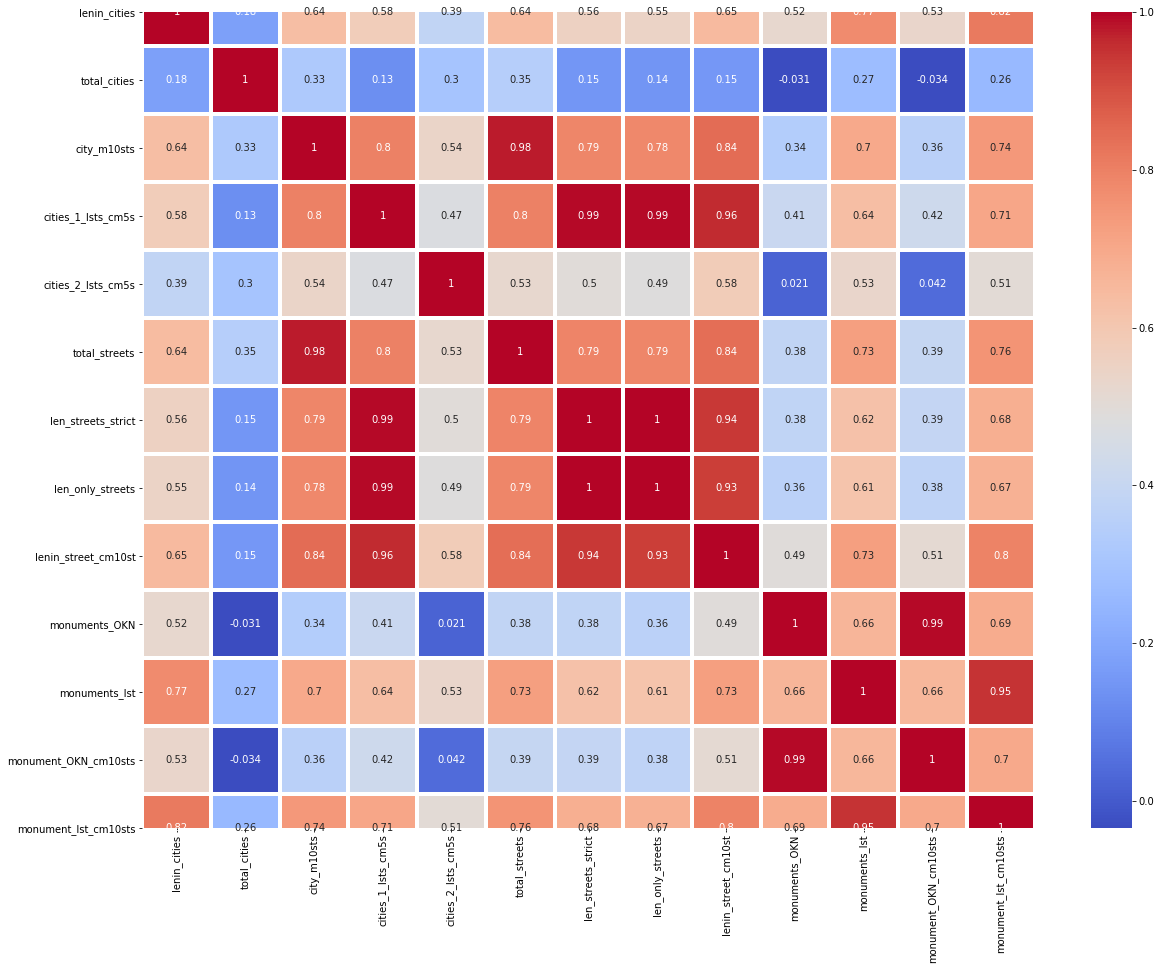

In [11]:
# тепловая карта

sns.heatmap(
    corr_matrix,
    annot=True, cmap='coolwarm', linewidths=3.0,
    xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values
)

fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

Пока все очевидно:

1) "Ленинские" города коррелируют с количеством монументов Ленина.

2) Количество самих памятников с количеством улиц.

3) И, конечно, количество ленинских улиц с общим количеством улиц.

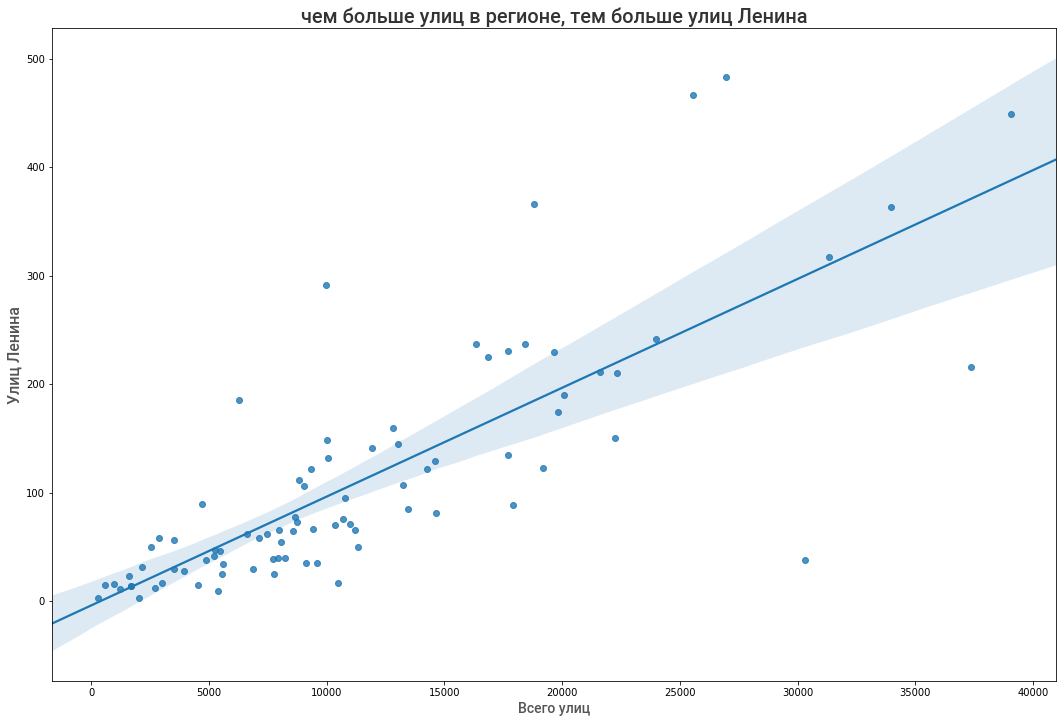

In [12]:
# диаграмма рассеяния для всех и ленинских улиц

plt.rcParams['figure.figsize']=(18,12)

fig, ax = plt.subplots()
sns.regplot(x='total_streets', y='len_streets_strict', data=work, ax=ax)

ax.set_title('чем больше улиц в регионе, тем больше улиц Ленина',
             fontsize = 20,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 600,
             color = '#333333'
             )

ax.set_xlabel('Всего улиц',
             fontsize = 14,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 500,
             color = '#555555'
             )

ax.set_ylabel('Улиц Ленина',
             fontsize = 16,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 500,
             color = '#555555'
             )
#fig.savefig('C:/00_Projects/Lenin/Viz/01_scatter_len_streets_total_streets.png', dpi=600)
plt.show()

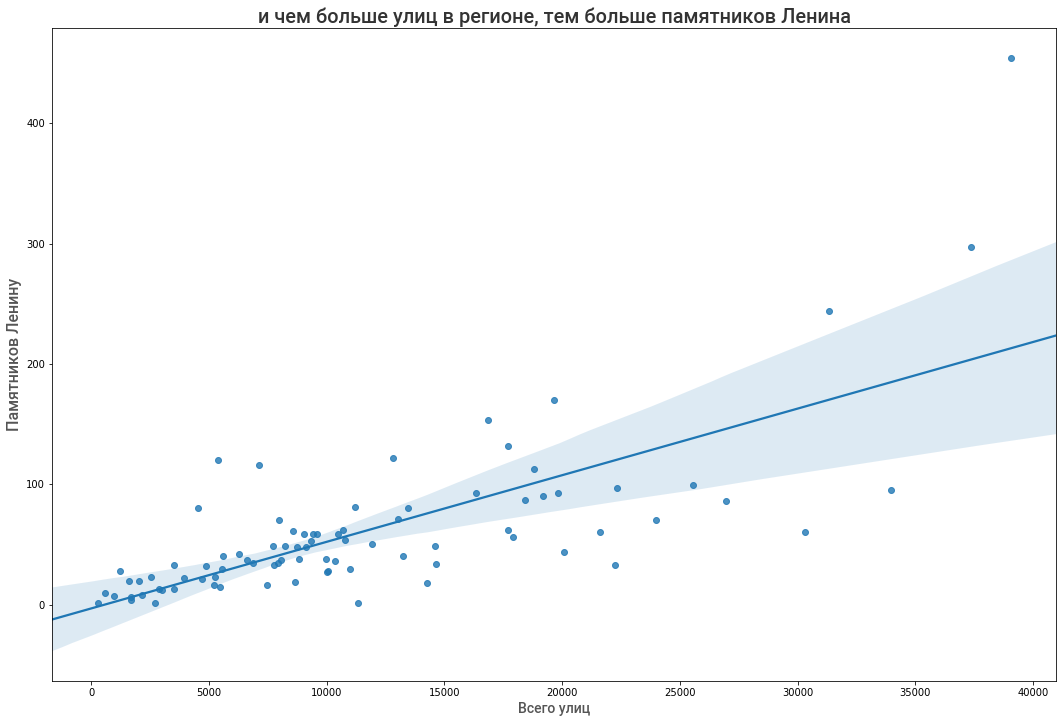

In [13]:
# диаграмма рассеяния для всех и ленинских улиц

plt.rcParams['figure.figsize']=(18,12)

fig, ax = plt.subplots()
sns.regplot(x='total_streets', y='monuments_lst', data=work, ax=ax)

ax.set_title('и чем больше улиц в регионе, тем больше памятников Ленина',
             fontsize = 20,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 600,
             color = '#333333'
             )

ax.set_xlabel('Всего улиц',
             fontsize = 14,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 500,
             color = '#555555'
             )

ax.set_ylabel('Памятников Ленину',
             fontsize = 16,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 500,
             color = '#555555'
             )

#fig.savefig('C:/00_Projects/Lenin/Viz/02_scatter_monument_total_streets.png', dpi=600)
plt.show()

In [14]:
# Проверяем коэффициент Пирсона

x = work.total_streets
y = work.len_streets_strict

In [15]:
# коэффициент Пирсона

pearsonr(x, y)

(0.7933329634021504, 1.410463115081706e-19)

In [16]:
# и Спирмена на всякий случай

x = work.total_streets / work.total_cities
y = work.len_streets_strict / work.total_cities

In [17]:
spearmanr(x, y)

SpearmanrResult(correlation=0.804592534688294, pvalue=1.7642847680403945e-20)

P-value очень маленький, нулевую гипотезу отклоняем.

In [18]:
work.head()

,region,lenin_cities,total_cities,city_m10sts,cities_1_lsts_cm5s,cities_2_lsts_cm5s,total_streets,len_streets_strict,len_only_streets,lenin_street_cm10st,monuments_OKN,monuments_lst,monument_OKN_cm10sts,monument_lst_cm10sts
0,Алтайский край,5.0,1586,482,204,1.0,18445,237,227,161,2.0,87,2.0,65
1,Амурская область,2.0,637,159,53,1.0,6642,62,59,46,32.0,37,19.0,20
2,Архангельская область,2.0,3931,169,33,4.0,7707,39,39,37,0.0,49,0.0,30
3,Астраханская область,1.0,437,170,93,6.0,8810,112,106,88,1.0,38,1.0,19
4,Белгородская область,4.0,1611,247,67,2.0,13438,85,81,55,14.0,80,9.0,47


In [19]:
# Проверяем корреляцию памятников и улиц

x = work.total_streets
y = work.monuments_lst

In [20]:
# коэффициент Пирсона

pearsonr(x, y)

(0.7282708584383948, 2.830924363436664e-15)

In [21]:
# посмотрим что там со всеми

work.total_streets.describe()

count       85.0000000000000
mean     11476.9058823529413
std       8600.4432798597081
min        287.0000000000000
25%       5382.0000000000000
50%       9354.0000000000000
75%      16354.0000000000000
max      39049.0000000000000
Name: total_streets, dtype: float64

In [22]:
# на дисперсию страшно смотреть

work.total_streets.var()

73967624.61008403

## Считаем относительный вес улиц и памятников ##

In [23]:
# создаем датафрейм с нужными колонками

work_weight = data[['datawrapperName', 'region',                    
                    'city_m5sts', 'city_m10sts',
                    'lenin_street_cm5st', 'lenin_street_cm10st',
                    'cities_1_lsts_cm5s', 'cities_1_lsts_cm10s',
                    'monument_OKN_cm5sts', 'monument_OKN_cm10sts',
                    'monument_lst_cm5sts', 'monument_lst_cm10sts']]

In [24]:
# создаем колонку с отношением ленинских улиц к количеству нас.пунктов с количеством улиц больше 5 и 10

work_weight.loc[:, 'lenin_street_weight_5'] = round(work_weight['lenin_street_cm5st'] / work_weight['city_m5sts'], 4)

work_weight.loc[:, 'lenin_street_weight_10'] = round(work_weight['lenin_street_cm10st'] / work_weight['city_m10sts'], 4)

C:\Users\Boris\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Boris\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
# создаем колонку с удельным весом городов с улицами Ленина от всех

work_weight.loc[:, 'cities_1_lsts_weight_5'] = round(work_weight['cities_1_lsts_cm5s'] / work_weight['city_m5sts'], 4)

work_weight.loc[:, 'cities_1_lsts_weight_10'] = round(work_weight['cities_1_lsts_cm10s'] / work_weight['city_m10sts'], 4)

In [26]:
# создаем колонку с отношением памятников ОКН к количеству городов

work_weight.loc[:, 'monument_OKN_weight_5'] = round(work_weight['monument_OKN_cm5sts'] / work_weight['city_m5sts'], 4)

work_weight.loc[:, 'monument_OKN_weight_10'] = round(work_weight['monument_OKN_cm10sts'] / work_weight['city_m10sts'], 4)

In [27]:
# создаем колонку с отношением памятников lst к количеству городов

work_weight.loc[:, 'monument_lst_weight_5'] = round(work_weight['monument_lst_cm5sts'] / work_weight['city_m5sts'], 4)

work_weight.loc[:, 'monument_lst_weight_10'] = round(work_weight['monument_lst_cm10sts'] / work_weight['city_m10sts'], 4)

In [28]:
work_weight.to_csv('C:/00_Projects/Lenin/Datasets/04_work_data/work_weight.csv', sep=',', encoding='utf-8', index=False)

In [29]:
work.head()

,region,lenin_cities,total_cities,city_m10sts,cities_1_lsts_cm5s,cities_2_lsts_cm5s,total_streets,len_streets_strict,len_only_streets,lenin_street_cm10st,monuments_OKN,monuments_lst,monument_OKN_cm10sts,monument_lst_cm10sts
0,Алтайский край,5.0,1586,482,204,1.0,18445,237,227,161,2.0,87,2.0,65
1,Амурская область,2.0,637,159,53,1.0,6642,62,59,46,32.0,37,19.0,20
2,Архангельская область,2.0,3931,169,33,4.0,7707,39,39,37,0.0,49,0.0,30
3,Астраханская область,1.0,437,170,93,6.0,8810,112,106,88,1.0,38,1.0,19
4,Белгородская область,4.0,1611,247,67,2.0,13438,85,81,55,14.0,80,9.0,47


In [30]:
x = work.monuments_OKN
y = work.monuments_lst

In [31]:
# коэффициент Пирсона

pearsonr(x, y)

(0.6621120877439387, 5.1916856370999915e-12)